In [ ]:
#PART 1 - VISUALISATION
#Question 1
# A survey was conducted to gauge audience interest in different data science topics,
# namely:
# Big Data (Spark / Hadoop)
# Data Analysis / Statistics
# Data Journalism
# Data Visualization
# Deep Learning
# Machine Learnin

In [20]:

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Use the 'pd.read_csv()' function to read a CSV file.
# The file path is specified as a raw string using 'r' to avoid escaping backslashes.
# The file path points to the location of the CSV file on your system.
# In this example, it's assumed that the CSV file is located at the specified path.
# 'index_col=0' indicates that the first column of the CSV should be used as the DataFrame's index.
df = pd.read_csv(r"C:\Users\User 2020\Documents\DSA822S-Assignment\Topic_Survey_Assignment.csv", index_col=0)

In [17]:
data

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [7]:
# Sort the DataFrame 'df' based on the values in the 'Very interested' column.
# 'by='Very interested'' specifies the column by which to sort.
# 'ascending=False' indicates that the sorting should be in descending order (from largest to smallest).
# 'inplace=True' means that the sorting operation should be applied directly to the 'df' DataFrame,
# and it will modify 'df' in place without creating a new DataFrame.
df.sort_values(by='Very interested', ascending=False, inplace=True)

In [10]:
#To display
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [ ]:
#Question 2

In [11]:
# Define the total number of respondents.
total_respondents = 2233

# Calculate the percentage of responses for each value in the DataFrame 'df'.
# 'df_percentage' will store the resulting percentages.
# The formula used is: (value in 'df' / total respondents) * 100
# The '* 100' part converts the fraction to a percentage.
# '.round(2)' rounds the percentages to two decimal places.
df_percentage = (df / total_respondents * 100).round(2)

In [13]:
# Define colors
colors = ['#5cb85c', '#5bc0de', '#d9534f']

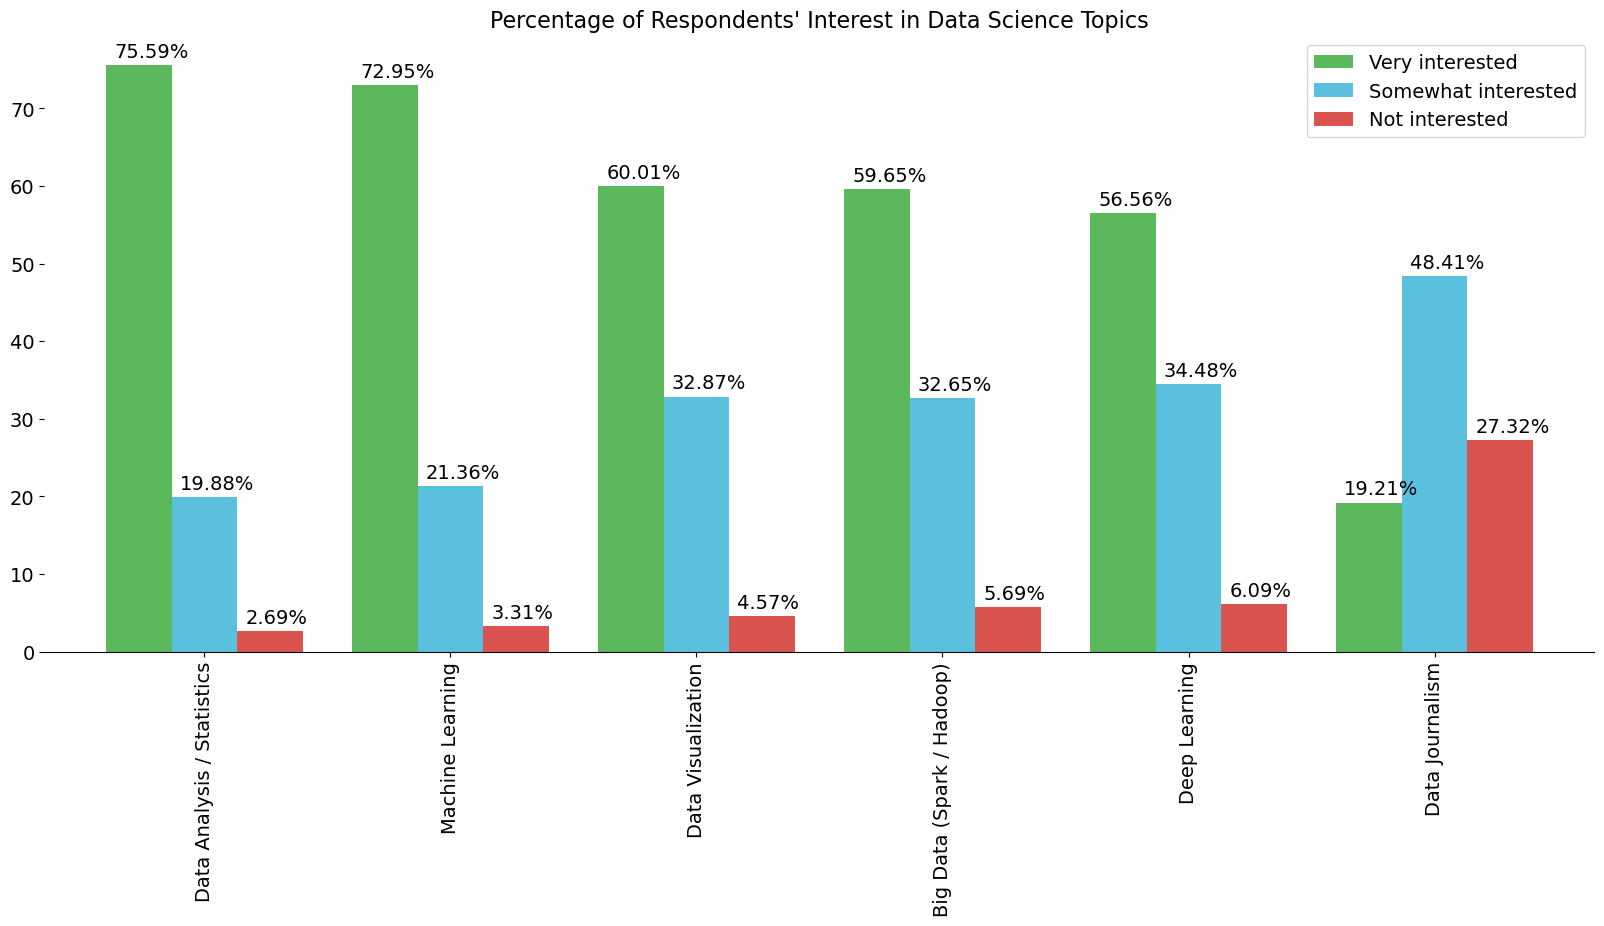

In [19]:
# Create the bar chart
ax = df_percentage.plot(kind='bar', figsize=(20, 8), width=0.8, color=colors, fontsize=14)
# Add title and adjust font size
ax.set_title('Percentage of Respondents\' Interest in Data Science Topics', fontsize=16)

# Remove left, top, and right borders
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentages above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2 - 0.1, p.get_height() + 1), fontsize=14)

# Add legend
ax.legend(fontsize=14)

# Remove y-axis label
ax.set_ylabel('')

# Show the plot
plt.show()


In [ ]:
#Part 2 - Supervised Learning Using Tree-Based Model

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [191]:
# Define the file path to the CSV file using a raw string.
file_path = (r"C:\Users\User 2020\Documents\DSA822S-Assignment\ClaimsData.csv") 

# Use the 'pd.read_csv()' function to read the CSV file and create a DataFrame 'df'.
df = pd.read_csv(file_path)

In [192]:
data

,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes
1,24097.69,SAV,63926.9,43,2018,No,No
2,19190.63,Small,134829.8,28,2018,No,Yes
3,20574.27,Small,59107.4,28,2018,No,Yes
4,26734.33,SAV,132746.9,22,2017,No,Yes
...,...,...,...,...,...,...,...
1495,19440.23,Sedan,97675.4,42,2012,No,Yes
1496,20230.45,Small,163871.9,53,2016,No,Yes
1497,26929.63,Sedan,66468.7,72,2017,No,No
1498,35422.28,SAV,94859.3,47,2018,No,Yes


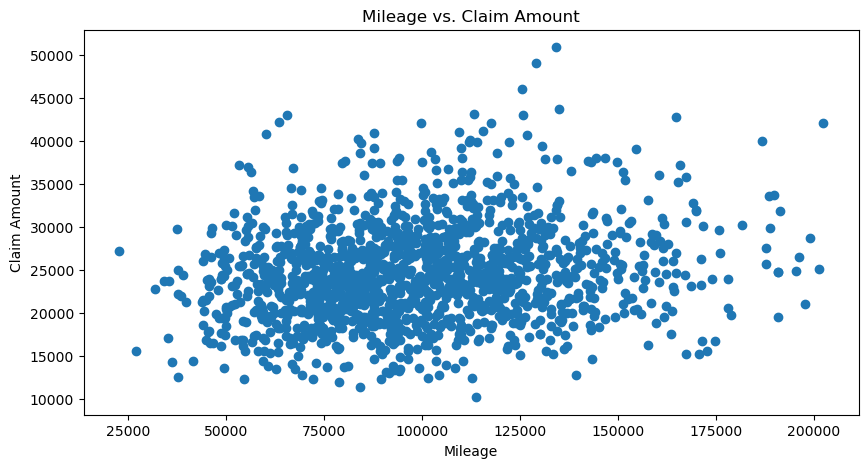

In [193]:
# Create a new figure with a specific figure size (width, height) in inches.
plt.figure(figsize=(10, 5))

# Create a scatter plot using the 'Mileage' column as the x-axis values
# and the 'Claim' column as the y-axis values from the DataFrame 'df'.
plt.scatter(df['Mileage'], df['Claim'])

# Set the x-axis label to 'Mileage, y-axis label to 'Claim Amount and Set the title of the plot.'.
plt.xlabel('Mileage')
plt.ylabel('Claim Amount')
plt.title('Mileage vs. Claim Amount')

# Display the plot.
plt.show()

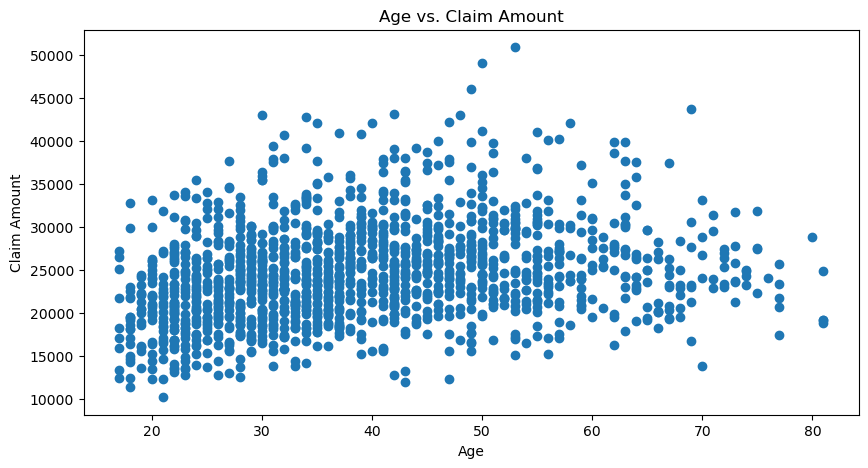

In [194]:
plt.figure(figsize=(10, 5))
plt.scatter(df['AgeP'], df['Claim'])
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.title('Age vs. Claim Amount')
plt.show()

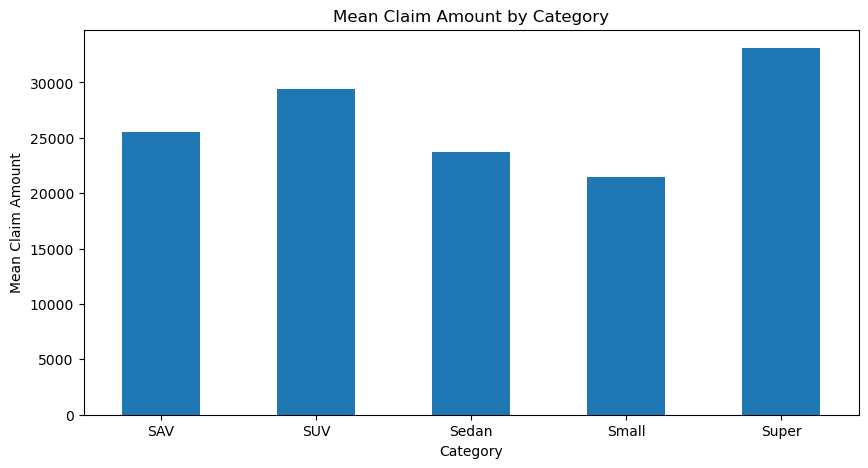

In [195]:
# Calculate the mean claim amount for each category using groupby.
mean_claim_by_category = df.groupby('Category')['Claim'].mean()

# Create a new figure with a specific figure size (width, height) in inches.
plt.figure(figsize=(10, 5))

# Create a bar plot of the mean claim amount by category.
mean_claim_by_category.plot(kind='bar')
# Set the x-axis label to 'Category,  Set the y-axis label to 'Mean Claim Amount and Set the title of the plot.''
plt.xlabel('Category')
plt.ylabel('Mean Claim Amount')
plt.title('Mean Claim Amount by Category')

# Rotate the x-axis labels to be horizontal (0 degrees).
plt.xticks(rotation=0)

# Display the plot.
plt.show()

In [ ]:
#Graph1 interpretation

# The graph allows us to compare the mean claim amounts for different categories of vehicles.
#We can see that "Super" category vehicles have the highest mean claim amount at 40,000, followed
#by "SUV" at 30,000. "SAV" and "Sedan" categories have mean claim amounts of 25,000 and 24,000,
#respectively, while "Small" category vehicles have the lowest mean claim amount at 20,000.

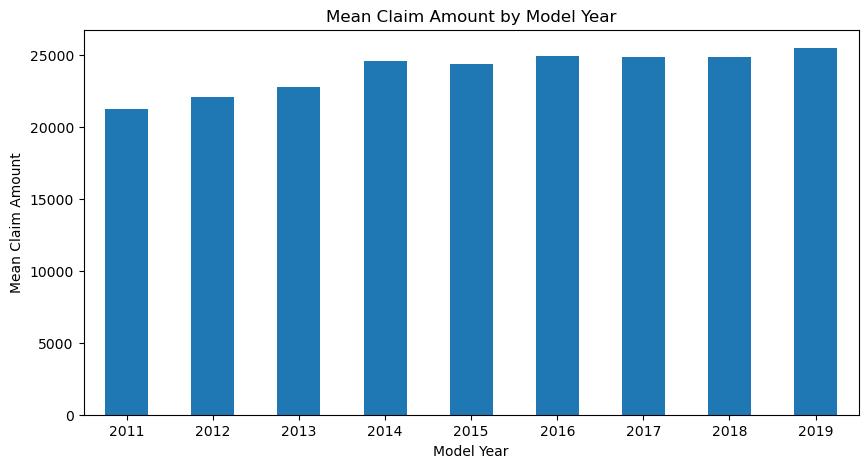

In [196]:
mean_claim_by_model_year = df.groupby('ModelYear')['Claim'].mean()
plt.figure(figsize=(10, 5))
mean_claim_by_model_year.plot(kind='bar')
plt.xlabel('Model Year')
plt.ylabel('Mean Claim Amount')
plt.title('Mean Claim Amount by Model Year')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Graph2 interpretation

#As we move from older model years (2011) to more recent ones (2019), the mean claim amount
#generally increases. This suggests that, on average, newer cars tend to have higher insurance claim amounts.

#Stability in Recent Years: From 2016 to 2019, the mean claim amount appears to be relatively stable, hovering
#around the 25,000 mark. This suggests that cars from these model years have similar insurance claim amounts,
#and there hasn't been a significant increase in recent years.

#Variance in Older Model Years: In contrast, there is more variation in mean claim amounts for older model years
# (2011 to 2015). While there is an overall increasing trend, there are fluctuations, indicating that cars from
#these model years can have a wider range of insurance claim amounts.

#2019 Stands Out: Among all the years, the model year 2019 has the highest mean claim amount at 26,000. This may
# indicate that cars from this year are more prone to higher insurance claims, possibly due to factors such as
#increased repair costs or accident frequency.

#Plateau Effect: Starting from 2016, there seems to be a plateau in mean claim amounts, where the values remain
#constant. This might suggest that cars from 2016 onwards have reached a certain level of insurance claim amounts
#that is not significantly changing.

In [197]:
# Calculate the mean claim amount for each category using groupby.
mean_claim_by_category = df.groupby('Category')['Claim'].mean()

# Print a message indicating what the following information represents.
print("Mean Claim Amount by Category:")

# Print the calculated mean claim amounts by category.
print(mean_claim_by_category)

Mean Claim Amount by Category:
Category
SAV      25567.220256
SUV      29439.955177
Sedan    23759.341389
Small    21458.093665
Super    33107.498750
Name: Claim, dtype: float64


In [198]:
mean_claim_by_model_year = df.groupby('ModelYear')['Claim'].mean()
print("\nMean Claim Amount by Model Year:")
print(mean_claim_by_model_year)


Mean Claim Amount by Model Year:
ModelYear
2011    21251.196667
2012    22089.076316
2013    22797.422576
2014    24559.396422
2015    24396.627463
2016    24930.396192
2017    24859.324408
2018    24844.633413
2019    25487.106147
Name: Claim, dtype: float64


In [199]:
# Use the 'pd.get_dummies()' function to perform one-hot encoding on 'df.'
# Columns specified in the 'columns' parameter will be one-hot encoded.
df_encoded = pd.get_dummies(df, columns=["Category", "PreOwned", "ServHist"])

In [200]:
# Create feature variables (X) by dropping the "Claim" column from 'df_encoded.'
X = df_encoded.drop("Claim", axis=1)

# Create the target variable (y) by selecting only the "Claim" column from 'df_encoded.'
y = df_encoded["Claim"]

In [201]:
# Split the dataset into training and testing sets.
# X_train: Training features
# X_test: Testing features
# y_train: Training target
# y_test: Testing target
# 'test_size=0.2' specifies that 20% of the data will be used for testing, and 80% for training.
# 'random_state=0' sets a random seed to ensure reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [207]:
# Create a decision tree regressor model with a maximum depth of 2.
tree_reg = DecisionTreeRegressor(max_depth=2)

# Train (fit) the decision tree regressor model using the training data.
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [203]:
# Get the column names (feature names) from the DataFrame 'X' and convert them to a list.
feature_names = X.columns.tolist()

In [204]:
# Export the textual representation of the decision rules from the decision tree regressor model.
# 'tree_rules' will contain the textual representation.
# The 'feature_names' parameter is used to associate feature names with the rules.
tree_rules = export_text(tree_reg, feature_names=feature_names)

In [205]:
# Print a message indicating that the following information represents decision tree rules.
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- AgeP <= 33.50
|   |--- PreOwned_No <= 0.50
|   |   |--- value: [25201.01]
|   |--- PreOwned_No >  0.50
|   |   |--- value: [21515.48]
|--- AgeP >  33.50
|   |--- Category_SUV <= 0.50
|   |   |--- value: [25483.89]
|   |--- Category_SUV >  0.50
|   |   |--- value: [30265.37]



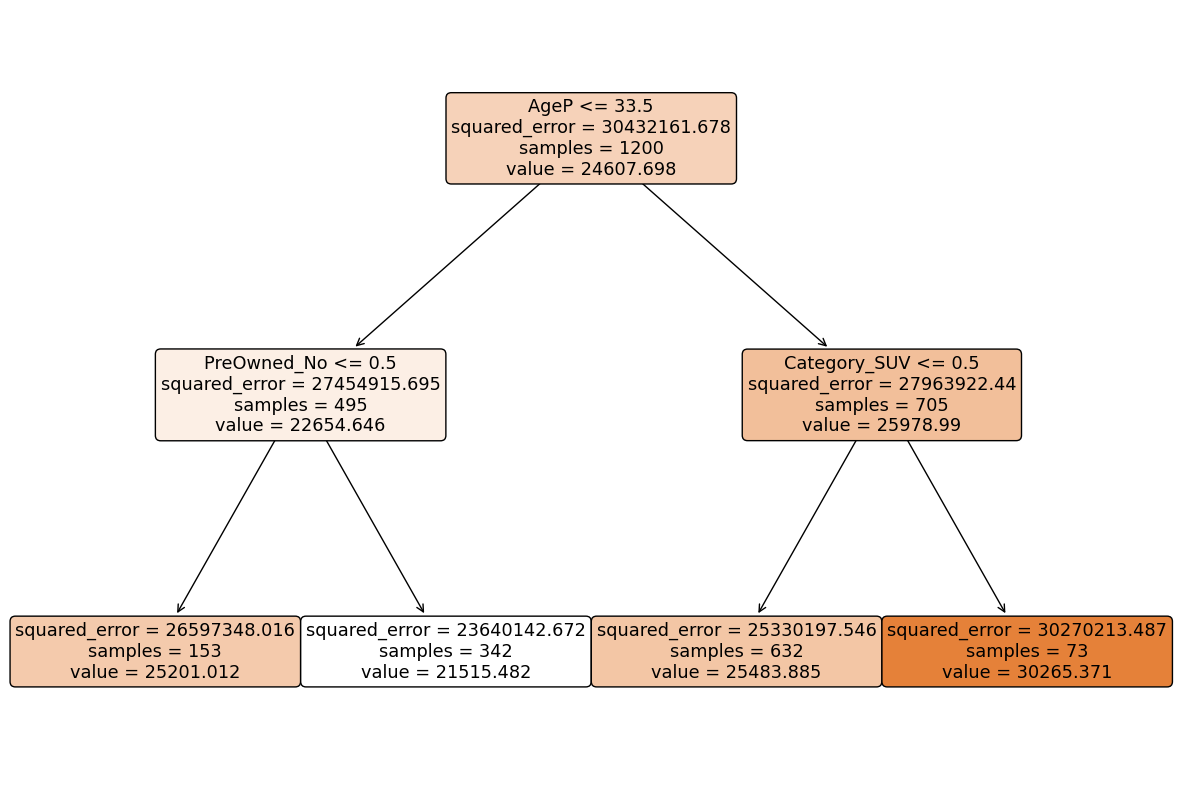

In [206]:
# Create a new figure with a specific figure size (width, height) in inches.
plt.figure(figsize=(15, 10))

# Plot the decision tree model using the 'plot_tree' function.
# 'tree_reg' is the decision tree regressor model.
# 'feature_names=feature_names' associates feature names with the tree.
# 'filled=True' fills the tree nodes with colors based on the target variable's value.
# 'rounded=True' rounds the corners of the tree nodes for a more visually appealing plot.
plot_tree(tree_reg, feature_names=feature_names, filled=True, rounded=True)
plt.show()

In [ ]:
#Insight Questions from a Fitted Tree-Based Model

# Question 1: You were asked to fit a tree-based model to this data set. Why do you think a
#tree-based model is more appropriate than a neural network in this scenario?

#Answer: Tree-based models can be used to handle categorical features, while neural networks
# typically require that all features be numeric. This is because tree-based models make
# predictions by splitting the data based on the values of the features, while neural networks
#make predictions by learning the relationships between the features

# Interpreting the Decision Tree:

#Answer: 

#The top-levelsplit suggests that the model has identified that the age of the insured
# person (AgeP) is an important factor in predicting insurance premiums. If the age is less than
# or equal to 33.5, the predicted insurance premium is approximately $24,607.698.

#The node further splits the data for individuals whose age is less than or equal to 33.5.
# It looks at whether the vehicle is pre-owned (PreOwned No). If the vehicle is not pre-owned
# (PreOwned No <= 0.5), the predicted premium is approximately $22,654.646.

#If the vehicle is pre-owned (PreOwned No > 0.5), the model further splits based on the vehicle
# category. If the vehicle is not an SUV (Category SUV <= 0.5), the predicted premium is approximately $25,978.990.

#In this sub-branch, the model has made another split, and the predicted premium for individuals who are younger than
# 33.5, own a non-pre-owned vehicle, and have a non-SUV category is approximately $25,201.012.

#Conversely, if the vehicle category is SUV, the predicted premium for individuals in the same age and pre-owned
# category is approximately $21,515.482.

#If the vehicle is pre-owned and the age is less than or equal to 33.5, the model predicts a premium of approximately
# $25,483.885.

#Finally, if the vehicle is pre-owned and falls in the older age category (greater than 33.5), the model predicts a higher
# premium of approximately $30,265.371.